<a href="https://colab.research.google.com/github/vandyahmad24/python_deeplearning/blob/master/Augmentor_binari_2objek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Latihan 01

Pada latihan ini, kita akan mencoba mencoba membedakan dua jenis gambar, gambar 5 dan s terbalik menggunakan Convolutional Neural Network (CNN) sederhana.

Latihan ini menggunakan teknik klasifikasi secara biner, alias hanya bisa membedakan 2 jenis kategori. Teknik untuk mengenali pattern gambar lebih dari 2 kategori akan dibahas di akhir kode.

## Install Library

Pertama, mari kita install library Augmentor terlebih dahulu

In [ ]:
!pip install Augmentor

## Download File

Jalankan perintah berikut untuk mendownload file `Latihan 1.zip` dari link google drive yang sudah dibagikan. Perintah `gdown` digunakan untuk mendownload file google drive yang sudah tershare secara publik dengan cara memanggil `id` file tersebut.

In [ ]:
!gdown --id 1kl8kRaxdYlewKTeYtdyUk_8Nb2Aygu_h
!unzip Latihan\ 1.zip

Downloading...
From: https://drive.google.com/uc?id=1kl8kRaxdYlewKTeYtdyUk_8Nb2Aygu_h
To: /content/Latihan 1.zip
100% 5.12k/5.12k [00:00<00:00, 4.57MB/s]
Archive:  Latihan 1.zip
   creating: dataset/
   creating: dataset/train/
   creating: dataset/train/5/
  inflating: dataset/train/5/5.png   
   creating: dataset/train/s/
  inflating: dataset/train/s/s.png   
   creating: dataset/test/
   creating: dataset/test/5/
   creating: dataset/test/s/
  inflating: pyAug.py                
  inflating: pyCNN_test.py           
  inflating: pyCNN_train.py          


## Persiapan Dataset

Persiapankan dataset test dengan menyalin file `5.png` dan `s.png` ke folder test.

In [ ]:
!cp dataset/train/5/5.png /content/dataset/test/5/
!cp dataset/train/s/s.png /content/dataset/test/s/

Sekarang, mari perbanyak masing-masing dataset train dan test dengan Augmentor.

In [ ]:
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
  source_dir = ini
  output_dir = "."
  p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
  p.zoom_random(probability=0.5, percentage_area=0.9)
  p.crop_random(probability=0.6, percentage_area=0.9)
  p.resize(probability=1.0, width=64, height=64)

  p.sample(sebanyak_ini)

perbanyak_("dataset/test/5", 30)
perbanyak_("dataset/test/s", 30)
perbanyak_("dataset/train/5", 270)
perbanyak_("dataset/train/s", 270)

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7433CA0DA0>: 100%|██████████| 30/30 [00:00<00:00, 240.86 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7433CC58D0>:  10%|█         | 3/30 [00:00<00:00, 46.46 Samples/s]

Initialised with 1 image(s) found.
Output directory set to dataset/test/5/..Initialised with 1 image(s) found.
Output directory set to dataset/test/s/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7433CC5710>: 100%|██████████| 30/30 [00:00<00:00, 225.12 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F742E4339B0>:   6%|▌         | 15/270 [00:00<00:06, 37.34 Samples/s]

Initialised with 1 image(s) found.
Output directory set to dataset/train/5/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F742E461BA8>: 100%|██████████| 270/270 [00:01<00:00, 249.82 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F742E417E48>:   3%|▎         | 7/270 [00:00<00:13, 20.08 Samples/s]

Initialised with 1 image(s) found.
Output directory set to dataset/train/s/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F742E433320>: 100%|██████████| 270/270 [00:01<00:00, 241.57 Samples/s]


Dan jangan lupa, hapuslah file original `5.png` dan `s.png` dari folder `train` untuk kita sisakan file original di folder `test`. Dengan ini kita mendapatkan 270 varian gambar 5 dan 270 varian gambar s untuk training, dan kita juga mendapatkan 31 varian gambar 5 dan 31 varian gambar s untuk testing.

In [ ]:
!rm dataset/train/5/5.png
!rm dataset/train/s/s.png

## FIle Training

Berikut adalah teknik untuk menampilkan 20 file yang ada pada folder `train/5` dan test `test/s`. Gunakan `glob` untuk mengambil daftar file pada suatu folder.

Jika anda menggunakan `jupyter notebook`, maka tambahkanlah baris `%matplotlib inline` di bawah `import matplotlib.pyplot as plt` untuk mengaktifkan penampil fungsi plot pada `notebook` anda.

In [ ]:
import glob
import matplotlib.pyplot as plt
#%matplotlib inline

def tampilkan_6_kali_5_gambar_pada_alamat(ini):
  a = glob.glob(ini)

  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 6
  rows = 5
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()

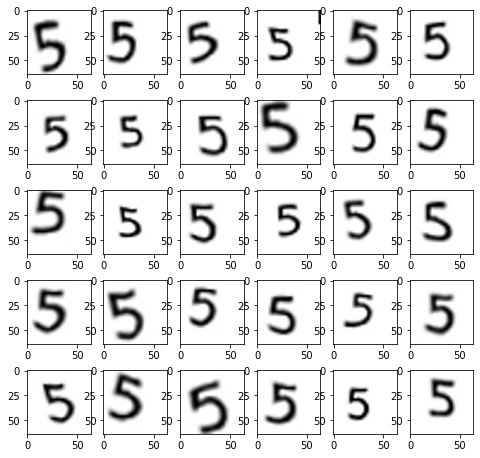

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("dataset/train/5/*")

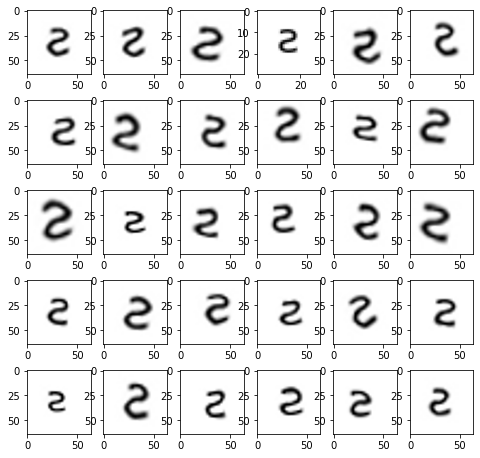

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("dataset/test/s/*")

## Fase Training

Pada fase training ini, dipergunakan arsitektur CNN sederhana yang terdiri atas 1 layer konvolusi, 1 layer pooling, 1 layer flatten, yang terkoneksi dengan 2 fully connected layer lainnya.

Hasil akhir penentuan ada pada bagian node paling akhir di mana

`model.add(Dense(units = 1, activation = 'sigmoid'))`

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator

size_ = 16

model = Sequential()

model.add(Conv2D(4, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


Berikut adalah arsitektur akhir CNN yang akan kita pergunakan.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 4)         112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 196)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1576      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


Sekarang, mari kita set konfigurasi di mana lokasi data train dan data test kita berada.

In [ ]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('dataset/train', target_size = (size_, size_), batch_size = 32, class_mode = 'binary')
test_data = test.flow_from_directory('dataset/test', target_size = (size_, size_), batch_size = 32, class_mode = 'binary')

Found 540 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


Pastikan isi folder `dataset/train`nya hanya terdiri atas 2 folder saja, tanpa ada folder tambahan `.ipynb_checkpoints`.

In [ ]:
!ls -al dataset/train/

total 68
drwxr-xr-x 4 root root  4096 Mar  9 23:02 .
drwxr-xr-x 4 root root  4096 Mar  9 14:48 ..
drwxr-xr-x 2 root root 28672 Jul 22 15:09 5
drwxr-xr-x 2 root root 32768 Jul 22 15:09 s


Sekarang, mari kita train model kita menggunakan 10 kali epoch (perulangan).

In [ ]:
model.fit_generator(train_data, steps_per_epoch = 100, epochs = 100, validation_data = test_data, validation_steps = 100)

Epoch 1/100
100/100 [==============================] - 7s 71ms/step - loss: 0.6535 - accuracy: 0.6644 - val_loss: 0.6032 - val_accuracy: 0.8548
Epoch 2/100
100/100 [==============================] - 7s 68ms/step - loss: 0.5577 - accuracy: 0.8652 - val_loss: 0.4481 - val_accuracy: 0.9194
Epoch 3/100
100/100 [==============================] - 7s 67ms/step - loss: 0.4116 - accuracy: 0.9475 - val_loss: 0.3151 - val_accuracy: 0.9194
Epoch 4/100
100/100 [==============================] - 7s 67ms/step - loss: 0.2521 - accuracy: 0.9663 - val_loss: 0.2563 - val_accuracy: 0.9677
Epoch 5/100
 98/100 [============================>.] - ETA: 0s - loss: 0.1585 - accuracy: 0.9695

ValueError: ignored

Seperti yang bisa dilihat, jika model anda sudah benar, maka seharusnya nilai akurasi akan meningkat perlahan hingga mendekati 1.000 (alias 100%).

## Fase Testing

Pada fase ini, mari kita test keakuratan model yang sudah kita buat, apakah dia benar-benar bisa mengenali gambar `5` dan `s` dengan benar. Mari kita ambil 2 contoh file yang akan kita coba test keakuratan modelnya.



In [ ]:
a = "dataset/test/5/5.png"
b = "dataset/test/s/s.png"

Berikut adalah isi kedua gambar yang akan kita test.

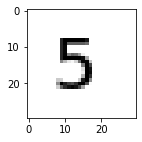

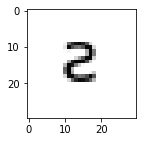

In [ ]:
def tampilkan_(ini):
  fig = plt.figure(figsize=(2, 2))
  img = plt.imread(ini)
  plt.imshow(img)
  plt.show()

tampilkan_(a)
tampilkan_(b)

Karena hasil prediksi dalam bentuk angka, maka kita perlu membangun kamus, yang mana hasil prediksi tadi yang masih berupa angka, ditautkan dengan nama sebenarnya. Berikut adalah teknik membangun kamus tersebut.

In [ ]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: '5', 1: 's'}


Sekarang terlihat bahwa `0` merepresentasikan `5` dan `1` merepresentasikan `s`.

Untuk test pertama kita, mari kita coba `5` terlebih dahulu.

In [ ]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(a, target_size = (size_, size_))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

hasil = model.predict_classes(img)
print("File gambar [", a, "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0][0]], ".")

File gambar [ dataset/test/5/5.png ] diprediksi sebagai [[0]] alias terbaca sebagai ::  5 .


Untuk mengecek probabilitas pada `class 1`, maka `img` bisa kita paksa untuk dibagi dengan bilangan `255.`.

In [ ]:
hasil = model.predict(img/255.)
print(hasil)

[[0.08580274]]


Untuk test kedua kita, mari kita coba `s` sebagai file testing.

In [ ]:
img = image.load_img(b, target_size = (size_, size_))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

hasil = model.predict_classes(img)
print("File gambar [", b, "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0][0]], ".")

File gambar [ dataset/test/s/s.png ] diprediksi sebagai [[1]] alias terbaca sebagai ::  s .


Untuk mengecek probabilitas pada `class 1`, maka `img` bisa kita paksa untuk dibagi dengan bilangan `255.`.

In [ ]:
hasil = model.predict(img/255.)
print(hasil)

[[0.98918635]]


In [ ]:
lol = glob.glob("dataset/test/5/*.png")

total = 0
for haha in lol:
  img = image.load_img(haha, target_size = (16, 16))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print("File gambar [s] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0][0]], ".")
  total += (0 == hasil[0][0])*1
print(total/len(lol))

## Kasus Non-Binary

Bagaimana jika data yang ingin kita prediksi jenisnya jumlahnya ada lebih dari 2? Untuk kasus seperti ini, kita perlu mengganti mode dari `binary` menjadi `categorical`.

### 1. Bagian Import
Berikut baris yang perlu anda tambahkan pada bagian `import`.

`from keras.metrics import categorical_accuracy`

### 2. Bagian Training

Pada bagian `activation`, ganti isi `units` dengan jumlah kategori yang ingin prediksi jenisnya. Jika anda menginginkan model anda dapat memprediksi 10 jenis gambar yang berbeda, maka gantilah menjadi 10. Adapun bagian `activation`, cobalah untuk menggantinya dengan `softmax`.

`model.add(Dense(units = 10, activation = 'softmax'))`

Pada bagian `model.compile`, gunakan categorical pada parameter-parameternya.

`model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [categorical_accuracy])`

### 3. Bagian Konfigurasi Lokasi Folder

Pada bagian konfigurasi lokasi folder, gantilah setiap `train` dan `test` dari `binary` menjadi `categorical`.

`train_data = train.flow_from_directory('dataset/train', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')`

`test_data = test.flow_from_directory('dataset/test', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')`

Akhir kata, selamat mencoba.